# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Putu Indri Cahyani
- **Email:** indricahyani548@gmail.com
- **ID Dicoding:** indricahyani

## Menentukan Pertanyaan Bisnis

- Produk apa yang dipesan paling banyak berdasarkan kategori produk?
- Bagaimana pengaruh waktu pengiriman terhadap tingkat kepuasan pelanggan?
- Siapa saja pelanggan yang paling berharga berdasarkan analisis RFM (Recency, Frequency, Monetary)?
- Bagaimana distribusi lokasi pelanggan Olist berdasarkan kota dan negara bagian?

## Import Semua Packages/Library yang Digunakan

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium as fo
from folium.plugins import MarkerCluster

## Data Wrangling

### Gathering Data

In [5]:
customers_df = pd.read_csv(r"C:\Users\Indri Cahyani\Desktop\E-Commerce Public Dataset\customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [7]:
orders_df = pd.read_csv(r"C:\Users\Indri Cahyani\Desktop\E-Commerce Public Dataset\orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
order_items_df = pd.read_csv(r"C:\Users\Indri Cahyani\Desktop\E-Commerce Public Dataset\order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [9]:
products_df = pd.read_csv(r"C:\Users\Indri Cahyani\Desktop\E-Commerce Public Dataset\products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
product_category_df = pd.read_csv(r"C:\Users\Indri Cahyani\Desktop\E-Commerce Public Dataset\product_category_name_translation.csv")
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [11]:
geolocation_df = pd.read_csv(r"C:\Users\Indri Cahyani\Desktop\E-Commerce Public Dataset\geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [12]:
order_payment_df = pd.read_csv(r"C:\Users\Indri Cahyani\Desktop\E-Commerce Public Dataset\order_payments_dataset.csv")
order_payment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [13]:
order_reviews_df = pd.read_csv(r"C:\Users\Indri Cahyani\Desktop\E-Commerce Public Dataset\order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


### Assessing Data

#### Menilai Tabel `customers_df`

In [14]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [15]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [16]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())
customers_df.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


- Tidak terdapat missing values
- Tidak terdapat duplikasi data
- Tidak terdapat tipe data yang salah

#### Menilai Tabel `orders_df`

In [17]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [19]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [18]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


- Terdapat missing values pada kolom order_approved_at sebanyak 160, kolom order_delivered_carrier_date sebanyak 1783, dan order_delivered_customer_date sebanyak 2965
- Tidak terdapat duplikasi data
- Terdapat tipe data yang salah, seharusnya kolom berikut memiliki tipe data Datetime =>
order_purchase_timestamp,
order_approved_at,                
order_delivered_carrier_date,
order_delivered_customer_date,
order_estimated_delivery_date,

#### Menilai Tabel `order_items_df`

In [19]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [20]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [23]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())
order_items_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


- Tidak terdapat missing values
- Terdapat tipe data yang salah, seharusnya kolom shipping_limit_date memiliki tipe data Datetime
- Tidak terdapat duplikasi data

#### Menilai Tabel `products_df`

In [21]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [22]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [23]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())
products_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


- Terdapat missing values pada semua kolom kecuali kolom product_id
- Tidak terdapat duplikasi data
- Tidak terdapat tipe data yang salah

#### Menilai Tabel `product_category_df`

In [24]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [25]:
product_category_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [26]:
print("Jumlah duplikasi: ", product_category_df.duplicated().sum())
product_category_df.describe()

Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


- Tidak terdapat missing values
- Tidak terdapat duplikasi data
- Tidak terdapat tipe data yang salah

#### Menilai Tabel `geolocation_df`

In [27]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [28]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [29]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())
geolocation_df.describe()

Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


- Tidak terdapat missing values
- Tidak terdapat duplikasi data
- Tidak terdapat tipe data yang salah

#### Menilai Tabel `order_payment_df`

In [30]:
order_payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [31]:
order_payment_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [32]:
print("Jumlah duplikasi: ", order_payment_df.duplicated().sum())
order_payment_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


- Tidak terdapat missing values
- Tidak terdapat duplikasi data
- Tidak terdapat tipe data yang salah

#### Menilai Tabel `order_reviews_df`

In [33]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [34]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [35]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())
order_reviews_df.describe()

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


- Terdapat missing values pada kolom review_comment_title sebanyak 87656 dan
review_comment_message sebanyak 58247
- Tidak terdapat duplikasi data
- Tidak terdapat tipe data yang salah

**Insight:**
- xxx
- xxx

### Cleaning Data

#### Membersihkan Tabel `orders_df`
**Mengubah Tipe Data yang Salah Menjadi Tipe Data DateTime**


In [36]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

In [37]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


**Menangani Missing Value**


In [38]:
# Daftar kolom yang ingin dihapus
columns_to_drop = ['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']

# Menghapus kolom
orders_df.drop(columns=columns_to_drop, inplace=True)

In [39]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(3)
memory usage: 3.8+ MB


#### Membersihkan Tabel `orders_items_df`
**Mengubah Tipe Data yang Salah Menjadi Tipe Data DateTime**


In [40]:
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

In [41]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### Membersihkan Tabel `products_df`
**Menangani Missing Value**


In [42]:
# Mengisi missing values dengan nilai default
products_df = products_df.assign(
    product_category_name=products_df['product_category_name'].fillna('Unknown'),
    product_name_lenght=products_df['product_name_lenght'].fillna(0),
    product_description_lenght=products_df['product_description_lenght'].fillna(0),
    product_photos_qty=products_df['product_photos_qty'].fillna(0)
)

# Mengisi missing values numerik dengan mean
products_df = products_df.assign(
    product_weight_g=products_df['product_weight_g'].fillna(products_df['product_weight_g'].mean()),
    product_length_cm=products_df['product_length_cm'].fillna(products_df['product_length_cm'].mean()),
    product_height_cm=products_df['product_height_cm'].fillna(products_df['product_height_cm'].mean()),
    product_width_cm=products_df['product_width_cm'].fillna(products_df['product_width_cm'].mean())
)

In [43]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32951 non-null  float64
 3   product_description_lenght  32951 non-null  float64
 4   product_photos_qty          32951 non-null  float64
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


#### Membersihkan Tabel `order_reviews_df`
**Menangani Missing Value dan Menghapus Kolom yang Tidak Diperlukan**


In [44]:
order_reviews_df = order_reviews_df.drop(columns=['review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp'])


In [45]:
print(order_reviews_df.head())

                          review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score  
0             4  
1             5  
2             5  
3             5  
4             5  


## Exploratory Data Analysis (EDA)

#### Explore `customers_df`

In [46]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [47]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
24750,b41e711f87202c50ba7d98ca8b5a7c84,616a1b47d7b62b80e8300adbcf244657,95800,venancio aires,RS
39542,7e6a2c82f870d4169d3cd945fcacee60,d497d6d20e5cf4baf00922c695e9b8c2,25251,duque de caxias,RJ
7816,ad1d816777885a62a3a72320d21861a2,167c4b188bfb3d78528f2d795400fa15,4911,sao paulo,SP
72973,67a2c81044afd5b588ea23b1617f9a3a,a1a374f4c131638dc698c76bebd11769,2050,sao paulo,SP
87600,3c041ed6508172bd338538fc864b8c5d,52d3c9e72091eca915f7e71c457ed368,12980,joanopolis,SP


In [48]:
customers_df.groupby(by="customer_city").agg({
    "customer_id": "nunique"
}).sort_values(by="customer_id", ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
agisse,1
vieiras,1
bertopolis,1


In [49]:
customers_df.groupby(by="customer_state").agg({
    "customer_id": "nunique"
}).sort_values(by="customer_id", ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


**Insight:**
- Jumlah customer terbanyak berasal dari kota (city) Sao Paulo
- SP menduduki posisi pertama sebagai negara bagian (state) dengan jumlah customer terbanyak.

#### Explore `geolocation_df`

In [50]:
geolocation_df.describe(include='all')

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


In [52]:
geolocation_df.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
700677,48020,-12.123464,-38.405321,alagoinhas,BA
483688,25065,-22.773732,-43.296515,duque de caxias,RJ
38678,2960,-23.492857,-46.702551,sao paulo,SP
832778,79051,-20.478411,-54.595833,campo grande,MS
375927,17700,-21.794411,-50.871313,osvaldo cruz,SP


In [53]:
geolocation_df[geolocation_df['geolocation_state'] == 'SP'].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


#### Explore `orders_df`

In [54]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date
13021,73421a5bdd55f86529569549055d9e82,633bca8614f7a9f458a5e0d222515aa8,delivered,2018-08-02 12:05:28,2018-08-17
12794,edc9fcd5f5ab3aa69901aa991026ee0c,07c457249ec4f7f19f0244025b671ccc,delivered,2017-06-03 11:55:09,2017-06-28
34453,4619fa9317a02816b5b83631ff90b93f,91df91f61d39461148a862af99f34ee5,delivered,2017-12-15 11:06:15,2018-01-04
19679,f744a90daf064199b23ec905bcd31a97,e71debe30488f0d8eac45ecafa13a725,delivered,2017-03-20 14:36:29,2017-04-11
29271,b0c7196170c9adcbf44c5b77f03165e5,9c3644078ac04eb62d98d3c2f6e51206,delivered,2018-08-11 22:17:09,2018-09-03


In [58]:
order_status_count = orders_df['order_status'].value_counts()
order_status_count

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [214]:
customer_order_count = orders_df['customer_id'].value_counts()
customer_order_count.head()

customer_id
edb027a75a1449115f6b43211ae02a24    1
f00bb12620b7b232233cace1b229db18    1
ad312389a098ceff46ce92c4595c06d0    1
a046c690e0564ffde0ce611b5eee2c30    1
3803547f820b1e10b7ad9c7985f06753    1
Name: count, dtype: int64

**Insight:**
- Status "delivered" menduduki posisi tertinggi, dengan 96.478 pesanan yang berhasil dikirimkan, menunjukkan mayoritas pesanan diselesaikan dengan baik.
- Status "shipped" berada di peringkat kedua dengan 1.107 pesanan, menandakan pesanan dalam proses pengiriman.
- Status "canceled" menduduki peringkat ketiga dengan 625 pesanan yang dibatalkan, menunjukkan jumlah pembatalan yang relatif kecil dibandingkan total pesanan.
- Terdapat 609 pesanan dengan status "unavailable", menunjukkan adanya masalah ketersediaan barang atau kendala pengiriman.
- Pesanan dengan status "created" dan "approved" sangat sedikit, masing-masing hanya 5 dan 2, mengindikasikan pesanan baru yang masih dalam tahap awal atau persetujuan.
- Secara keseluruhan, data ini menunjukkan bahwa sebagian besar pesanan telah diproses dan dikirim dengan sukses, sementara jumlah pembatalan dan masalah lainnya relatif kecil.

#### Explore `customers_df` dan `orders_df`

In [70]:
ordersCustomers_df = pd.merge(
    left=customers_df,
    right=orders_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
ordersCustomers_df.head()
     

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-08-15


In [71]:
ordersCustomers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).head(10)

customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: order_id, dtype: int64

In [72]:
ordersCustomers_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False).head(10)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

**Insight:**
- São Paulo menduduki peringkat teratas sebagai kota dengan jumlah customer terbanyak, yakni 15.540 customer, yang menunjukkan dominasi kota ini sebagai pasar utama.
- Rio de Janeiro berada di peringkat kedua dengan 6.882 customer, diikuti oleh Belo Horizonte (2.773) dan Brasilia (2.131), yang juga merupakan kota-kota besar dengan kontribusi signifikan terhadap pesanan.
- Kota-kota besar seperti Curitiba, Campinas, dan Porto Alegre juga menunjukkan kehadiran yang cukup kuat dengan lebih dari 1.000 customer masing-masing, memperlihatkan penyebaran yang cukup merata di berbagai kota besar di Brasil.
- Dari 96.478 pesanan yang berhasil delivered, dapat diasumsikan bahwa sebagian besar pesanan berasal dari kota-kota besar seperti São Paulo dan Rio de Janeiro, mengingat tingginya jumlah customer dari kota-kota ini.
- Tingginya jumlah pesanan yang berhasil dikirimkan dibandingkan pesanan yang shipped (1.107) atau canceled (625) menunjukkan performa logistik yang baik.
- Jumlah pesanan dengan status unavailable sebanyak 609 menunjukkan beberapa masalah ketersediaan produk, namun ini masih relatif kecil dibandingkan dengan total pesanan yang sukses.
- Kota-kota besar seperti São Paulo dan Rio de Janeiro kemungkinan berkontribusi pada sebagian besar pesanan yang delivered, mengingat tingginya jumlah customer di kota-kota ini.

#### Explore `products_df` dan `product_category_df`

In [73]:
procat_df = pd.merge(
    left=products_df,
    right=product_category_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
procat_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [77]:
procat_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head(20)

product_category_name
cama_mesa_banho                      3029
esporte_lazer                        2867
moveis_decoracao                     2657
beleza_saude                         2444
utilidades_domesticas                2335
automotivo                           1900
informatica_acessorios               1639
brinquedos                           1411
relogios_presentes                   1329
telefonia                            1134
bebes                                 919
perfumaria                            868
fashion_bolsas_e_acessorios           849
papelaria                             849
cool_stuff                            789
ferramentas_jardim                    753
pet_shop                              719
Unknown                               610
eletronicos                           517
construcao_ferramentas_construcao     400
Name: product_id, dtype: int64

In [76]:
procat_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(20)

product_category_name_english
bed_bath_table                     3029
sports_leisure                     2867
furniture_decor                    2657
health_beauty                      2444
housewares                         2335
auto                               1900
computers_accessories              1639
toys                               1411
watches_gifts                      1329
telephony                          1134
baby                                919
perfumery                           868
fashion_bags_accessories            849
stationery                          849
cool_stuff                          789
garden_tools                        753
pet_shop                            719
electronics                         517
construction_tools_construction     400
home_appliances                     370
Name: product_id, dtype: int64

**Insight:**
- Kategori "bed_bath_table" memiliki ketersediaan tertinggi dengan 3.029 produk, menunjukkan bahwa barang-barang rumah tangga yang berkaitan dengan tidur dan mandi sangat tersedia dan mungkin menjadi fokus penjualan utama.
- Kategori "sports_leisure" dengan 2.867 produk menunjukkan bahwa tersedia banyak pilihan untuk barang olahraga dan rekreasi, mencerminkan permintaan yang kuat di segmen ini.
- Kategori dengan ketersediaan yang rendah seperti "home_appliances" (370) dan "construction_tools_construction" (400) mungkin menunjukkan bahwa ada ruang untuk meningkatkan stok atau memperkenalkan lebih banyak variasi produk dalam segmen ini.
- Data ini mencerminkan kecenderungan pelanggan untuk lebih memilih produk rumah tangga, olahraga, dan kesehatan, menandakan bahwa ketersediaan produk-produk tersebut perlu terus dipertahankan atau bahkan ditingkatkan.


#### Explore `procat_df` dan `order_items_df`

In [80]:
orderProducts_df = pd.merge(
    left=order_items_df,
    right=procat_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
orderProducts_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


In [81]:
orderProducts_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price":  ["min", "max"]
})

order_id  price         
                               nunique    min      max
product_category_name_english                         
agro_industry_and_commerce         182  12.99  2990.00
air_conditioning                   253  10.90  1599.00
art                                202   3.50  6499.00
arts_and_craftmanship               23   9.80   289.49
audio                              350  14.90   598.99
...                                ...    ...      ...
stationery                        2311   2.29  1693.00
tablets_printing_image              79  14.90   889.99
telephony                         4199   5.00  2428.00
toys                              3886   4.90  1699.99
watches_gifts                     5624   8.99  3999.90

[71 rows x 3 columns]

#### Explore `order_payment_df` dan  `order_reviews_df`

In [83]:
order_payment_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
93203,405be8487a7fde1db0bc31ad6b08050a,1,voucher,1,8.89
76723,bc69ce22573ef61da22888eb42b976d1,1,credit_card,2,126.32
102711,1798a9d3b896e39ea128c25cf6b84ee4,1,credit_card,1,14.00
55638,abfbbd144a437c6a51564ea668aab4b6,1,boleto,1,159.82
33906,09efb7cd51fbc54c89edb7aff4a3f637,1,credit_card,3,115.45


In [84]:
order_payment_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

In [86]:
paymentReviews_df = pd.merge(
    left=order_payment_df,
    right=order_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
paymentReviews_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0


In [90]:
# Mengelompokkan dan mengagregasi data
payment_summary = paymentReviews_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value": ["min", "max"]
})

# Mengurutkan hasil berdasarkan jumlah pesanan (order_id) dari yang terbanyak
payment_summary = payment_summary.sort_values(by=("order_id", "nunique"), ascending=False)

# Menampilkan hasil
print(payment_summary)

             order_id payment_value          
              nunique           min       max
payment_type                                 
credit_card     76505          0.01  13664.08
boleto          19784         11.62   7274.88
voucher          3866          0.00   3184.34
debit_card       1528         13.38   4445.50
not_defined         3          0.00      0.00


In [93]:
cust_df = pd.merge(
    left=ordersCustomers_df,
    right=paymentReviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
cust_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-06-05,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-02-06,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-06-13,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-04-10,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-08-15,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0


**Insight:**
- Kartu Kredit menjadi metode pembayaran yang paling populer dengan 76.505 transaksi, menunjukkan bahwa pelanggan lebih cenderung menggunakan kartu kredit untuk pembelian mereka. Dengan nilai pembayaran minimum 0.01 dan maksimum 13.664,08, ini menunjukkan fleksibilitas penggunaan kartu kredit untuk berbagai jenis transaksi, dari yang kecil hingga besar.
- Boleto mencatat 19.784 transaksi, dengan nilai pembayaran minimum 11.62 dan maksimum 7.274.88. Meskipun tidak sepopuler kartu kredit, boleto masih merupakan metode pembayaran yang signifikan, mungkin karena preferensi pelanggan untuk melakukan pembayaran melalui metode tradisional.


#### Explore All Data

In [158]:
allData = pd.merge(
    left=cust_df,
    right=orderProducts_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
allData.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,payment_sequential,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-06-05,1.0,...,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-02-06,1.0,...,46.48,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-06-13,1.0,...,17.79,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-04-10,1.0,...,23.36,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,office_furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-08-15,1.0,...,22.25,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,home_confort


In [159]:
allData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    119143 non-null  object        
 1   customer_unique_id             119143 non-null  object        
 2   customer_zip_code_prefix       119143 non-null  int64         
 3   customer_city                  119143 non-null  object        
 4   customer_state                 119143 non-null  object        
 5   order_id                       119143 non-null  object        
 6   order_status                   119143 non-null  object        
 7   order_purchase_timestamp       119143 non-null  datetime64[ns]
 8   order_estimated_delivery_date  119143 non-null  datetime64[ns]
 9   payment_sequential             119140 non-null  float64       
 10  payment_type                   119140 non-null  object        
 11  

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana distribusi pelanggan di berbagai kota dan negara bagian?

In [206]:
print("5 kota (city) dengan jumlah pelanggan terbanyak:\n",
      allData.groupby(by="customer_city").customer_id.nunique().sort_values(
          ascending=False).head(5),
      "\n")
print("5 negara (state) dengan jumlah pelanggan terbanyak:\n",
      allData.groupby(by="customer_state").customer_id.nunique().sort_values(
          ascending=False).head(5))

5 kota (city) dengan jumlah pelanggan terbanyak:
 customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
Name: customer_id, dtype: int64 

5 negara (state) dengan jumlah pelanggan terbanyak:
 customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
Name: customer_id, dtype: int64


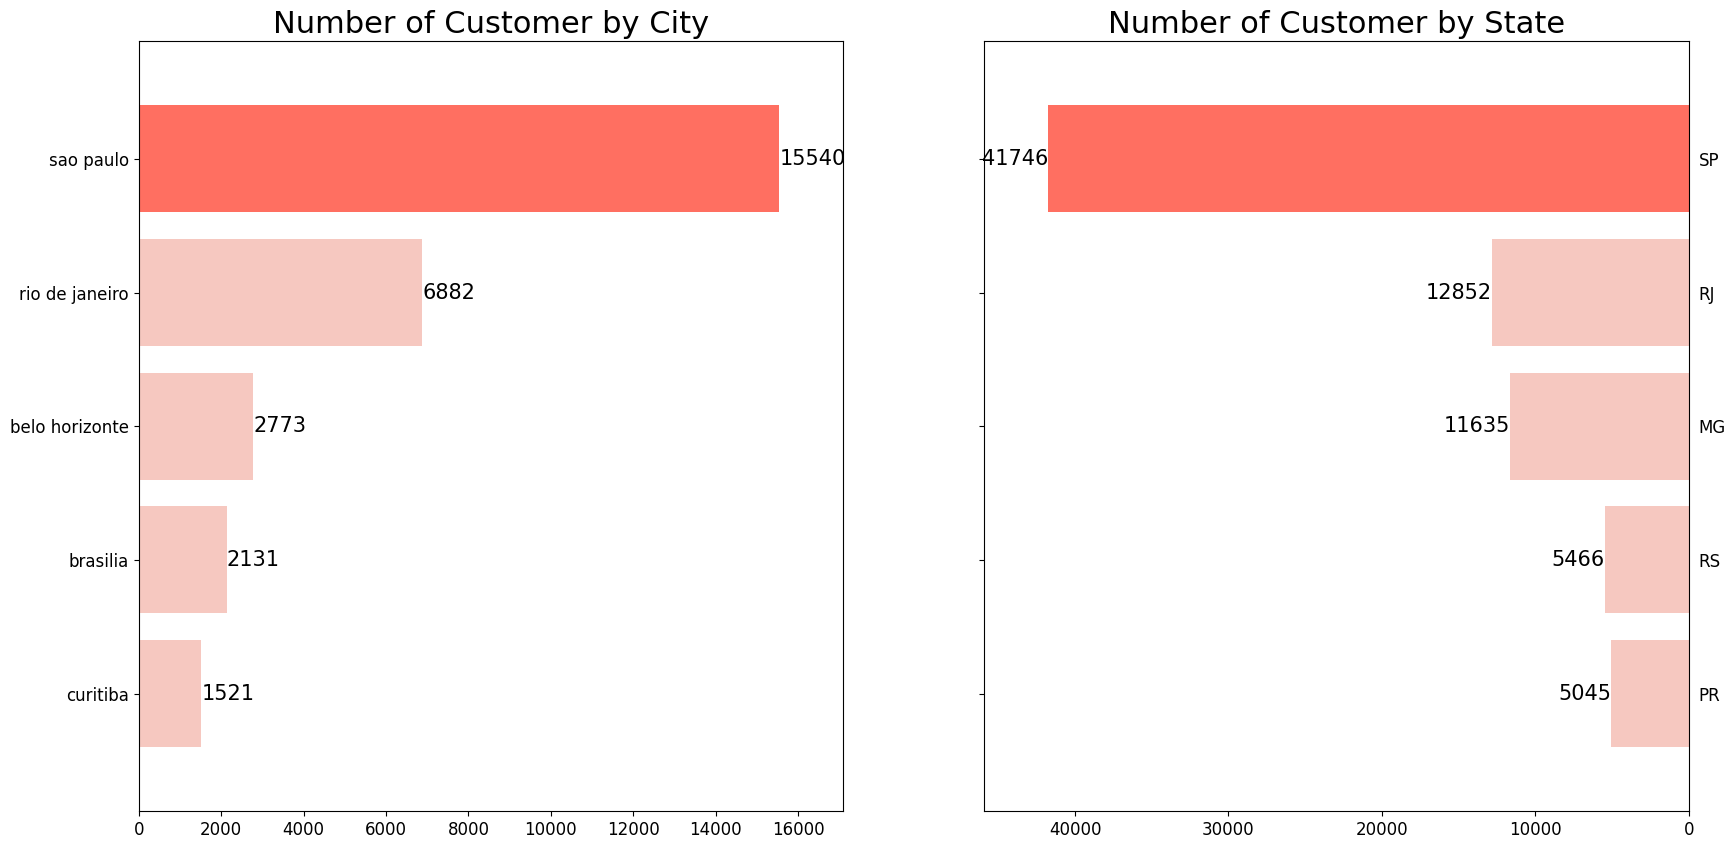

In [211]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# by city
sns.barplot(
    allData.groupby("customer_city").customer_id.nunique().sort_values(
          ascending=False).head(5),
    ax=ax[0],
    orient="h",
    color="#FFC2B7"
)
ax[0].patches[0].set_facecolor("#FF6F61")
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Number of Customer by City", fontsize=22)
ax[0].tick_params(axis="y", labelsize=12)
ax[0].tick_params(axis="x", labelsize=12)
ax[0].bar_label(ax[0].containers[0], label_type="edge", fontsize=15)
ax[0].margins(0.1)

# by state
sns.barplot(
    allData.groupby("customer_state").customer_id.nunique().sort_values(
          ascending=False).head(5),
    ax=ax[1],
    orient="h",
    color="#FFC2B7"
)
ax[1].patches[0].set_facecolor("#FF6F61")
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Number of Customer by State", fontsize=22)
ax[1].invert_xaxis()
ax[1].tick_params(axis="y", labelsize=12, labelleft=False, labelright=True)
ax[1].tick_params(axis="x", labelsize=12)
ax[1].bar_label(ax[1].containers[0], label_type="edge", fontsize=15)
ax[1].margins(0.1)

### Pertanyaan 2: Kategori produk mana yang memiliki penjualan tertinggi? dan Apakah ada kategori produk yang perlu diperhatikan untuk pengembangan lebih lanjut?

In [96]:
totalPenjualan_df = allData.groupby("product_category_name_english")["product_id"].count().reset_index()
totalPenjualan_df = totalPenjualan_df.rename(columns={"product_category_name_english": "Products Name"})
totalPenjualan_df = totalPenjualan_df.rename(columns={"product_id": "Products ID"})
totalPenjualan_df = totalPenjualan_df.sort_values(by="Products ID", ascending=False)
totalPenjualan_df = totalPenjualan_df.head(10)

totalPenjualan_df.head()

,Products Name,Products ID
7,bed_bath_table,11988
43,health_beauty,10032
65,sports_leisure,9004
39,furniture_decor,8832
15,computers_accessories,8150


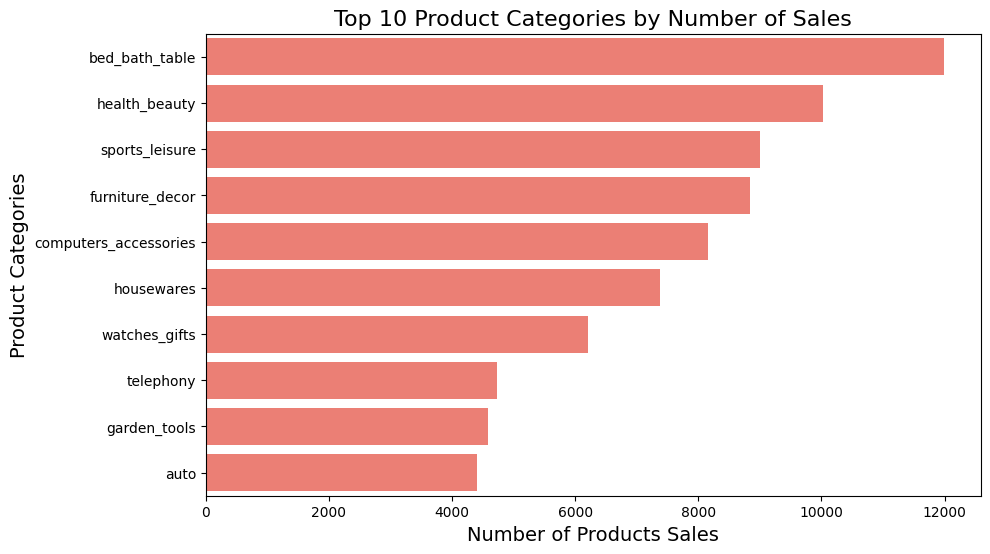

In [198]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Products ID', y='Products Name', data=totalPenjualan_df, color='#FF6F61')

# Menambahkan judul dan label
plt.title('Top 10 Product Categories by Number of Sales', fontsize=16)
plt.xlabel('Number of Products Sales', fontsize=14)
plt.ylabel('Product Categories', fontsize=14)

# Menampilkan diagram
plt.show()

### Pertanyaan 3: Bagaimana distribusi skor ulasan pelanggan?

Most common score: 5.0


C:\Users\Indri Cahyani\AppData\Local\Temp\ipykernel_15540\998724490.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ratingScores.index,


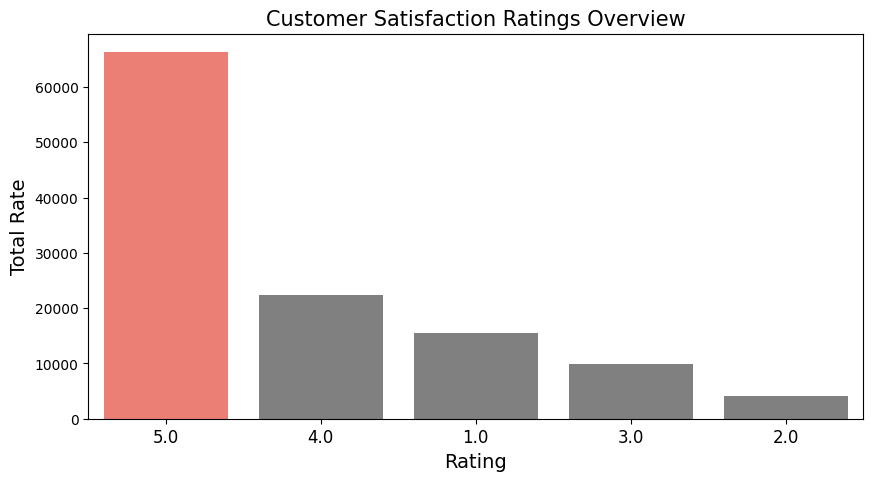

In [160]:
ratingScores = allData['review_score'].value_counts().sort_values(ascending=False)
most_common_score = ratingScores.idxmax()

# Menampilkan nilai rating yang paling umum
print("Most common score:", most_common_score)

colors = ["#FF6F61" if score == most_common_score else "grey" for score in ratingScores.index]

plt.figure(figsize=(10, 5))
sns.barplot(x=ratingScores.index,
            y=ratingScores.values,
            order=ratingScores.index,
            palette=colors,
            legend=False
            )

plt.title("Customer Satisfaction Ratings Overview", fontsize=15)
plt.xlabel("Rating", fontsize=14 )
plt.ylabel("Total Rate", fontsize=14)
plt.xticks(fontsize=12)
plt.show()

### Pertanyaan 4: Bagaimana proporsi penggunaan masing-masing metode pembayaran?

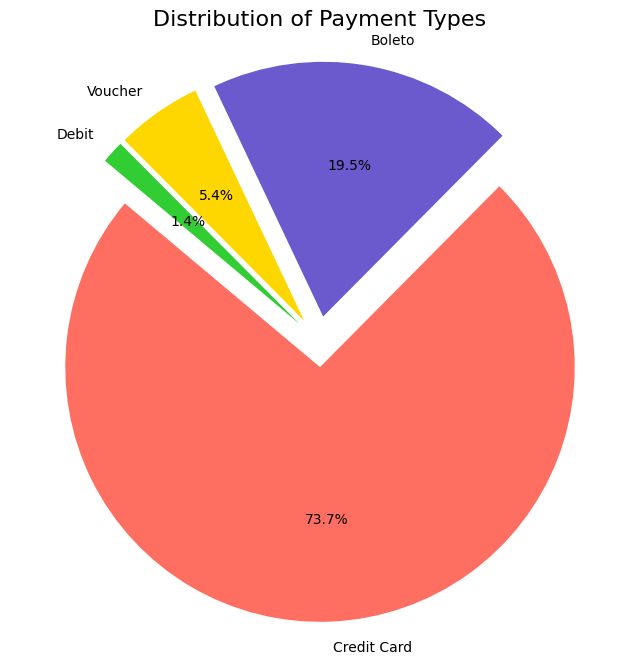

In [154]:
# Rename payment types
payment_labels = {
    'credit_card': 'Credit Card',
    'boleto': 'Boleto',
    'voucher': 'Voucher',
    'debit_card': 'Debit',
    'not_defined': 'Other'  # Shortened label for 'not_defined'
}

# Replace the payment_type values with the new labels
allData['payment_type'] = allData['payment_type'].replace(payment_labels)

# Count the occurrences of each payment type
payment_counts = allData['payment_type'].value_counts()

# Filter out 'Other' category for visualization
filtered_payment_counts = payment_counts[payment_counts.index != 'Other']

# Set colors for the pie chart
colors = ['#FF6F61', '#6A5ACD', '#FFD700', '#32CD32']  # Customize colors as needed

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(filtered_payment_counts, 
        labels=filtered_payment_counts.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=colors, 
        explode=[0.1] * len(filtered_payment_counts))  # Add explosion effect for each slice

# Add title and adjust aspect ratio
plt.title('Distribution of Payment Types', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Pertanyaan 5: Bagaimana tren penjualan bulanan?

In [115]:
allData['order_purchase_timestamp'] = pd.to_datetime(allData['order_purchase_timestamp'])
allData['bulan'] = allData['order_purchase_timestamp'].dt.to_period('M')

penjualan_per_bulan = allData.groupby('bulan')['price'].agg(['sum', 'mean']).reset_index()

print(penjualan_per_bulan)

      bulan         sum        mean
0   2016-09      267.36   44.560000
1   2016-10    51068.92  132.646545
2   2016-12       10.90   10.900000
3   2017-01   129895.32  126.974897
4   2017-02   262013.86  126.393565
5   2017-03   398117.44  124.372833
6   2017-04   392595.36  137.079385
7   2017-05   549226.84  123.560594
8   2017-06   456867.47  119.536230
9   2017-07   536906.96  109.864326
10  2017-08   606026.98  116.008227
11  2017-09   665047.38  129.487418
12  2017-10   697457.32  124.169008
13  2017-11  1055072.10  115.992975
14  2017-12   773574.02  117.332629
15  2018-01   993701.49  115.506392
16  2018-02   889512.29  110.884105
17  2018-03  1029589.67  119.831200
18  2018-04  1031717.62  124.724084
19  2018-05  1032699.42  125.464636
20  2018-06   910053.03  123.046651
21  2018-07   927401.38  126.074141
22  2018-08   884731.52  118.533162
23  2018-09      145.00  145.000000
24  2018-10        0.00         NaN


C:\Users\Indri Cahyani\AppData\Local\Temp\ipykernel_15540\4035655699.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  penjualan_per_bulan['bulan'] = pd.to_datetime(penjualan_per_bulan['bulan'])


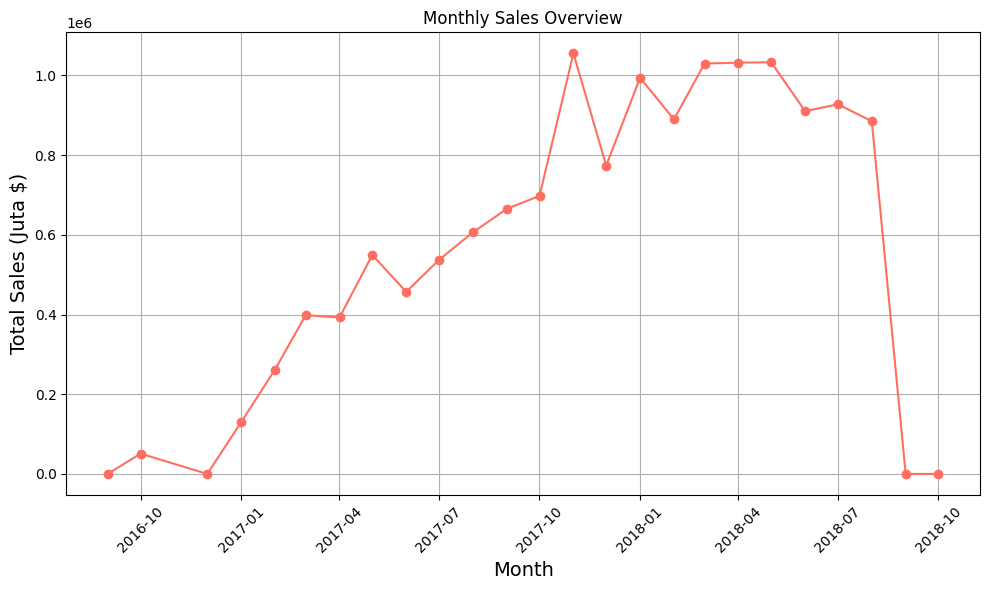

In [215]:
penjualan_per_bulan['bulan'] = penjualan_per_bulan['bulan'].astype(str) + '-01'
penjualan_per_bulan['bulan'] = pd.to_datetime(penjualan_per_bulan['bulan'])

plt.figure(figsize=(10, 6))
plt.plot(penjualan_per_bulan['bulan'], penjualan_per_bulan['sum'], marker='o', color="#FF6F61", linestyle='-')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales (Juta $)', fontsize=14)
plt.title('Monthly Sales Overview')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

## Analisis Lanjutan (RFM Analysis Berdasarkan Customer Unique ID)

In [204]:
# Menghitung tanggal terakhir order
recent_date = pd.to_datetime("today").date()  # Ganti dengan tanggal terkini jika perlu

# Membuat DataFrame RFM
rfm_df = allData.groupby(by="customer_unique_id", as_index=False).agg({
    "order_purchase_timestamp": "max",  # Tanggal order terakhir
    "order_id": "nunique",               # Menghitung jumlah order
    "payment_value": "sum"               # Menghitung total revenue
})

# Mengubah nama kolom
rfm_df.columns = ["customer_unique_id", "max_order_timestamp", "frequency", "monetary"]

# Menghitung recency
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date  # Ubah menjadi tanggal
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

# Menghapus kolom max_order_timestamp
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)

# Menampilkan DataFrame RFM
print(rfm_df.head())

                 customer_unique_id  frequency  monetary  recency
0  0000366f3b9a7992bf8c76cfdf3221e2          1    141.90     2336
1  0000b849f77a49e4a4ce2b2a4ca5be3f          1     27.19     2339
2  0000f46a3911fa3c0805444483337064          1     86.22     2762
3  0000f6ccb0745a6a4b88665a16c9f078          1     43.62     2546
4  0004aac84e0df4da2b147fca70cf8255          1    196.89     2513


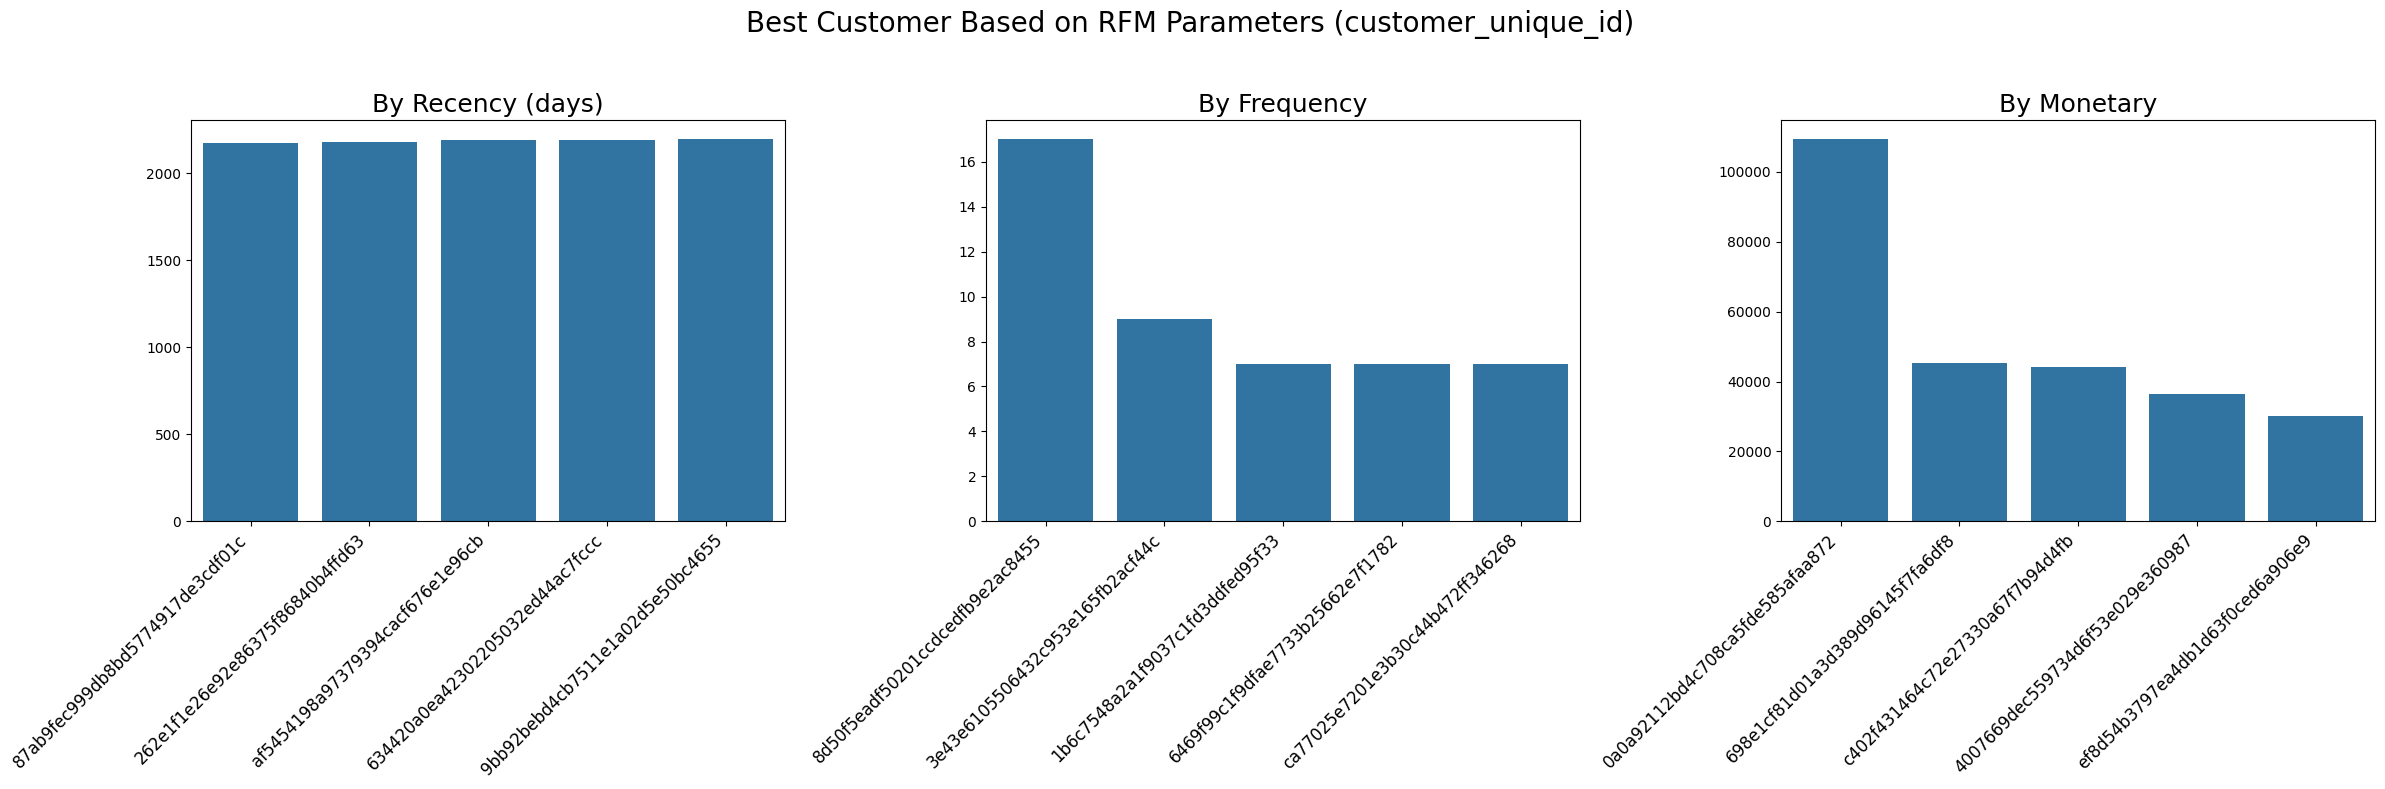

In [219]:
# Membuat subplot dengan ukuran lebih besar
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24, 8))  # Ukuran figure disesuaikan

# Warna untuk bar plot
colors = ["#72BCD4"] * 5

# Bar plot untuk Recency
sns.barplot(
    y="recency", 
    x="customer_unique_id",
    data=rfm_df.sort_values(by="recency", ascending=True).head(5), 
    ax=ax[0]
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=12)  # Ukuran label sumbu X disesuaikan
ax[0].set_xticks(range(5))  # Atur ticks untuk sumbu X
ax[0].set_xticklabels(rfm_df.sort_values(by="recency", ascending=True).head(5)["customer_unique_id"], rotation=45, ha='right')  # Memutar label sumbu X

# Bar plot untuk Frequency
sns.barplot(
    y="frequency", 
    x="customer_unique_id", 
    data=rfm_df.sort_values(by="frequency", ascending=False).head(5), 
    ax=ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=12)  # Ukuran label sumbu X disesuaikan
ax[1].set_xticks(range(5))  # Atur ticks untuk sumbu X
ax[1].set_xticklabels(rfm_df.sort_values(by="frequency", ascending=False).head(5)["customer_unique_id"], rotation=45, ha='right')  # Memutar label sumbu X

# Bar plot untuk Monetary
sns.barplot(
    y="monetary", 
    x="customer_unique_id", 
    data=rfm_df.sort_values(by="monetary", ascending=False).head(5), 
    ax=ax[2]
)
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=12)  # Ukuran label sumbu X disesuaikan
ax[2].set_xticks(range(5))  # Atur ticks untuk sumbu X
ax[2].set_xticklabels(rfm_df.sort_values(by="monetary", ascending=False).head(5)["customer_unique_id"], rotation=45, ha='right')  # Memutar label sumbu X

# Judul keseluruhan
plt.suptitle("Best Customer Based on RFM Parameters (customer_unique_id)", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Menyesuaikan layout agar judul tidak terpotong
plt.show()

## Conclusion

- Conclution pertanyaan 1 **Bagaimana distribusi pelanggan di berbagai kota dan negara bagian?**

Kota dengan jumlah pelanggan terbanyak adalah **São Paulo**, diikuti oleh Rio de Janeiro dan Belo Horizonte. Distribusi ini menunjukkan konsentrasi pelanggan yang signifikan di kawasan metropolitan besar, yang dapat menjadi target utama untuk strategi pemasaran dan penjualan.Di tingkat negara bagian, **SP (São Paulo)** juga menempati posisi teratas dengan jumlah pelanggan yang jauh lebih tinggi dibandingkan dengan negara bagian lainnya, seperti RJ (Rio de Janeiro) dan MG (Minas Gerais). Hal ini menandakan potensi pasar yang besar di negara bagian ini.
- Conclution pertanyaan 2 **Kategori produk mana yang memiliki penjualan tertinggi?**

Kategori produk **bed_bath_table** dan **health_beauty** mencatat penjualan tertinggi, menunjukkan minat pelanggan yang kuat terhadap produk rumah tangga dan kecantikan. Kategori ini perlu diperhatikan untuk pengembangan lebih lanjut, terutama dalam promosi dan peningkatan variasi produk. Perlu adanya peningkatan penjualan maupun promosi bagi kategori produk seperi automotive dll.
- Conclution pertanyaan 3 **Bagaimana distribusi skor dari ulasan pelanggan?**

Skor ulasan pelanggan menunjukkan bahwa skor paling umum yang diterima adalah **skor 5**, dengan bintang 4 berada di urutan kedua dan bintang 1 di urutan ketiga. Hal ini menandakan tingkat kepuasan yang tinggi di kalangan pelanggan, tetapi juga adanya perhatian terhadap ulasan negatif. Analisis lebih lanjut diperlukan untuk memahami umpan balik negatif dan meningkatkan kualitas produk dan layanan.

- Conclution pertanyaan 4 **Bagaimana proporsi penggunaan masing-masing metode pembayaran?**

Pembayaran melalui **Credit Card** merupakan metode yang paling umum digunakan, diikuti oleh Boleto dan Voucher. Distribusi ini memberikan wawasan penting bagi perusahaan dalam menentukan metode pembayaran yang harus difasilitasi lebih lanjut untuk memenuhi preferensi pelanggan.
- Conclution pertanyaan 5 **Bagaimana tren penjualan bulanan?**

Data penjualan bulanan menunjukkan **fluktuasi** yang signifikan, dengan puncak penjualan terjadi pada bulan-bulan tertentu seperti akhir tahun dan pertengahan bulan yang mungkin saja pada bulan tersebut terjadi peningkatan dikarenakan musim libur. Perencanaan strategis dan promosi dapat dilakukan untuk meningkatkan penjualan pada bulan-bulan dengan performa rendah.
- Conclution Analisis Lanjutan **Analisis RFM (Recency, Frequency, Monetary)**

Analisis RFM menunjukkan bahwa beberapa pelanggan melakukan pembelian tunggal dengan nilai yang bervariasi. Ini menunjukkan perlunya upaya lebih lanjut untuk mengonversi pelanggan satu kali menjadi pelanggan setia melalui program loyalitas dan pemasaran yang lebih terfokus.

## Rekomendasi

- Targetkan kampanye pemasaran di kota dan negara bagian dengan konsentrasi pelanggan tinggi.
- Fokus pada kategori produk dengan penjualan tertinggi dan lakukan survei untuk memahami preferensi pelanggan.
- Tingkatkan metode pembayaran yang paling populer untuk kenyamanan pelanggan.
- Rencanakan promosi musiman berdasarkan tren penjualan bulanan untuk memaksimalkan pendapatan.
-Implementasikan strategi untuk meningkatkan loyalitas pelanggan dengan memanfaatkan data dari analisis RFM.


In [220]:
allData.to_csv("all_data.csv", index=False)